What is a Decision Tree, and how does it work? \
A **Decision Tree** is a supervised machine learning algorithm used for both **classification** and **regression** tasks. It builds a tree-like model by splitting the dataset based on feature values to make predictions.

## How a Decision Tree Works

1. **Root Node**:  
   - Starts with the entire dataset.  
   - Selects the **best feature** to split the data (using criteria like Gini impurity or entropy).  

2. **Splitting**:  
   - Divides data into branches (subsets) based on the selected feature.  
   - Aims to maximize **information gain** (reducing uncertainty).  

3. **Recursive Process**:  
   - Repeats splitting for each child node until:  
     - All samples in a node belong to the same class (*pure node*).  
     - No further splits improve the model (*stopping condition*).  
     - Maximum tree depth is reached.  

4. **Leaf Nodes (Prediction)**:  
   - Terminal nodes provide the final output:  
     - **Classification**: Majority class in the leaf.  
     - **Regression**: Mean/median of target values. \  
What are impurity measures in Decision Trees?
# Impurity Measures in Decision Trees

Impurity measures quantify how **mixed** or **uncertain** the class distribution is within a dataset. Decision trees use these measures to determine the **best feature** to split the data at each node. Lower impurity means better separation between classes.

---

## Common Impurity Measures

---

## Comparison Table

| Measure          | Algorithm       | Range       | Pros                          | Cons                          |
|------------------|----------------|------------|-------------------------------|-------------------------------|
| Gini Impurity    | CART           | [0, 0.5]   | Fast computation              | Bias toward many classes      |
| Entropy          | ID3, C4.5      | [0, 1]     | Sensitive to class balance    | Slower (log calculations)     |
| Variance Reduction | CART Regression | ≥ 0       | Good for continuous targets  | Regression only               |

---

## Key Takeaways
- **Classification:** Use Gini or Entropy (lower = better)
- **Regression:** Use Variance Reduction (higher = better)
- Trees maximize information gain at each split

What is the mathematical formula for Gini Impurity? \
# Gini Impurity Formula

The **Gini Impurity** is a measure used in decision trees to evaluate the impurity or disorder of a dataset. It quantifies the likelihood of incorrect classification if a random label is chosen according to the distribution of labels in the subset.

## Formula
For a dataset with \( C \) classes, the Gini Impurity \( G \) is calculated as:

$
G = 1 - \sum_{i=1}^{C} p_i^2
$

where:
- $( p_i $) is the probability (proportion) of class $( i $) in the dataset.

## Explanation
- If all instances belong to a single class (\( p_i = 1 \) for some \( i \)), then \( G = 0 \) (pure).
- If the classes are evenly distributed (maximal impurity), \( G \) approaches its maximum value (e.g., for two classes, \( G = 0.5 \)).
\

What is the mathematical formula for Entropy?
# Entropy Formula

The **Entropy** is a measure of disorder or uncertainty in a dataset, commonly used in decision trees (e.g., ID3, C4.5) to evaluate the purity of splits. Higher entropy indicates greater unpredictability.

## Formula
For a dataset with $( C $) classes, the Entropy $( H $) is defined as:

$
H = -\sum_{i=1}^{C} p_i \log_2(p_i)
$

where:
- $( p_i $) is the probability (proportion) of class \( i \) in the dataset.
- $( \log_2 $) is the logarithm base 2 (resulting in units of *bits*).

## Explanation
- **Minimum Entropy (0)**: Occurs when all samples belong to one class (pure node).  
  Example: \( p_i = 1 \) for any \( i \) → \( H = 0 \).
- **Maximum Entropy**: Occurs when classes are uniformly distributed (maximal impurity).  
  Example: For \( C \) classes, \( H_{\text{max}} = \log_2(C) \).

## Example
Suppose a node has:
- 4 samples of **Class A**
- 2 samples of **Class B**

Then:
- $( p_A = \frac{4}{6} = \frac{2}{3} $), $( p_B = \frac{2}{6} = \frac{1}{3} $)
- Entropy:
  $
  H = -\left( \frac{2}{3} \log_2\left(\frac{2}{3}\right) + \frac{1}{3} \log_2\left(\frac{1}{3}\right) \right) \approx 0.918 \text{ bits}
  $

## Key Notes
1. **Base of Logarithm**: Base 2 is standard (bits), but natural log (base \( e \)) can also be used (nats).
2. **Comparison with Gini**:  
   - Both measure impurity, but Gini is slightly faster to compute.  
   - Entropy tends to produce more balanced splits in decision trees.

What is Information Gain, and how is it used in Decision Trees? \

# Information Gain in Decision Trees

**Information Gain (IG)** is a measure used in decision trees to select the best attribute for splitting the data at each node. It quantifies how much a given feature improves the purity (homogeneity) of the target variable (class labels) after the split.

## Key Concepts

### 1. Entropy (Measure of Impurity)
- **Entropy** quantifies the uncertainty or disorder in a dataset.
- For a binary classification problem, entropy is calculated as:  
  $
  \text{Entropy}(S) = -p_+ \log_2(p_+) - p_- \log_2(p_-)
  $
  where:
  - $( p_+ $) = Proportion of positive examples in $( S $).
  - $( p_- $) = Proportion of negative examples in $( S $).

### 2. Information Gain (IG)
- **IG** measures the reduction in entropy after splitting the dataset on a particular attribute.
- Formula:
  $
  \text{IG}(S, A) = \text{Entropy}(S) - \sum_{v \in \text{Values}(A)} \frac{|S_v|}{|S|} \text{Entropy}(S_v)
  $
  where:
  - \( A \) = Attribute being evaluated.
  - \( S_v \) = Subset of data where \( A \) has value \( v \).
  - $( \frac{|S_v|}{|S|} $) = Weighting factor for each subset.

## How Decision Trees Use Information Gain

1. **Start at the Root Node**  
   - Compute the entropy of the entire dataset.

2. **Evaluate Each Attribute**  
   - For each candidate attribute:
     - Calculate entropy of subsets after splitting.
     - Compute weighted average entropy.
     - Determine **Information Gain** (difference between parent and child entropy).

3. **Select the Best Attribute**  
   - Choose the attribute with the **highest IG** for splitting.

4. **Repeat Recursively**  
   - Continue splitting until stopping conditions are met (e.g., max depth, pure nodes).

## Example

Suppose we have a dataset with two classes ("Yes" and "No") and an attribute **"Outlook"** (values: "Sunny," "Overcast," "Rainy"):

| Outlook  | Class |
|----------|-------|
| Sunny    | No    |
| Sunny    | No    |
| Overcast | Yes   |
| Rainy    | Yes   |
| Rainy    | Yes   |

### Step 1: Calculate Parent Entropy
$
\text{Entropy}(S) = -\left(\frac{3}{5}\log_2 \frac{3}{5} + \frac{2}{5}\log_2 \frac{2}{5}\right) ≈ 0.971
$

### Step 2: Calculate Entropy After Split on "Outlook"
- **Sunny:** Entropy = \( 0 \) (all "No").  
- **Overcast:** Entropy = \( 0 \) (all "Yes").  
- **Rainy:** Entropy = \( 0 \) (all "Yes").  
- **Weighted Entropy:** $( \frac{2}{5} \times 0 + \frac{1}{5} \times 0 + \frac{2}{5} \times 0 = 0 $).

### Step 3: Compute Information Gain
$
\text{IG} = 0.971 - 0 = 0.971 \quad \text{(High IG → Good split)}
$

What is the difference between Gini Impurity and Entropy? \
- **Gini Impurity** is generally preferred for its computational efficiency
- **Entropy** provides more theoretical rigor but is slightly slower
- Both typically yield similar results in practice
- Choice often depends on the algorithm/library being used

\
What is the mathematical explanation behind Decision Trees?

# Mathematical Foundations of Decision Trees

Decision Trees use recursive partitioning to split data into subsets based on feature values. The core mathematics involves:

## 1. Splitting Criteria
Decision Trees optimize splits using impurity measures:

### a) Gini Impurity
$
Gini(S) = 1 - \sum_{i=1}^c (p_i)^2
$
- \(p_i\): Proportion of class \(i\) in set \(S\)
- \(c\): Number of classes
- **Splitting goal**: Choose feature that minimizes weighted sum of child node Gini impurities

### b) Entropy
$
Entropy(S) = -\sum_{i=1}^c p_i \log_2 p_i
$
- Measures uncertainty in \(S\)
- **Information Gain** (preferred split):
  $
  IG(S,A) = Entropy(S) - \sum_{v \in Values(A)} \frac{|S_v|}{|S|} Entropy(S_v)
  $

## 2. Decision Rules
At each node \(t\):
1. Calculate impurity \(I(t)\) (Gini/Entropy)
2. For each candidate split \(s\):
   - Compute impurity reduction:
     $
     \Delta I(s,t) = I(t) - p_LI(t_L) - p_RI(t_R)
     $
     where \(p_L, p_R\) are proportions going left/right
3. Select split with maximum $(\Delta I$)

## 3. Stopping Conditions
Recursion stops when:
- Maximum tree depth reached
- Node samples < minimum split threshold
- $(\Delta I(s,t) < \epsilon$) (no significant improvement)
- All samples belong to one class

## 4. Prediction
For a new sample \(x\):
$
\hat{y} = \text{majority class of leaf node } L(x)
$
For regression trees:
$
\hat{y} = \text{mean of } y \text{ values in } L(x)
$

## 5. Mathematical Optimization
The tree building process solves:
$
\arg\min_{splits} \sum_{leaves} \sum_{x_i \in leaf} \mathcal{L}(y_i, \hat{y}_{leaf})
$
where \(\mathcal{L}\) is the loss function (classification error/MSE).

## Key Properties
- **Greedy algorithm**: Optimizes locally at each node
- **Non-parametric**: No assumptions about data distribution
- **Piecewise constant approximation**: Creates axis-aligned decision boundaries
\

What is Pre-Pruning in Decision Trees?

# Pre-Pruning in Decision Trees

## Definition
Pre-pruning (also called **early stopping**) refers to techniques that prevent a decision tree from growing to its full depth during the training phase by imposing constraints.

## Key Pre-Pruning Methods

### 1. Maximum Depth (`max_depth`)
- Restricts tree depth
- Example: `max_depth=3` limits to 3 splits

### 2. Minimum Samples Split (`min_samples_split`)
- Minimum number of samples required to split a node
- Example: `min_samples_split=10` prevents splits on nodes with <10 samples

### 3. Minimum Samples Leaf (`min_samples_leaf`)
- Minimum samples required to be a leaf node
- Example: `min_samples_leaf=5` ensures each leaf has ≥5 samples

### 4. Maximum Leaf Nodes (`max_leaf_nodes`)
- Limits total number of leaf nodes
- Example: `max_leaf_nodes=10` stops after creating 10 leaves

### 5. Minimum Impurity Decrease (`min_impurity_decrease`)
- Split must improve impurity by at least this value
- Example: `min_impurity_decrease=0.01` prevents trivial splits

## Mathematical Formulation
For a candidate split at node $( t $):
$
\text{Split allowed if: } \Delta I(t) \geq \text{min\_impurity\_decrease}
$
where $( \Delta I(t) $) is impurity reduction:
$
\Delta I(t) = I(t) - \frac{N_{left}}{N}I(t_{left}) - \frac{N_{right}}{N}I(t_{right})
$

## Advantages of Pre-Pruning
✅ Computationally efficient (avoids full tree growth)  
✅ Reduces overfitting by limiting complexity  
✅ More interpretable models  

## Disadvantages
❌ Risk of underfitting if constraints too strict  
❌ Requires careful parameter tuning  
❌ May miss important interactions in deeper trees  

\

What is Post-Pruning in Decision Trees?
# Post-Pruning in Decision Trees

## Definition
Post-pruning (also called **cost-complexity pruning**) is a technique where a fully grown decision tree is systematically reduced in size **after** construction by removing unnecessary branches.

## How It Works

1. **Grow the full tree** (allow it to overfit)
2. **Identify subtrees** that contribute little to predictive accuracy
3. **Replace them with leaf nodes** containing the majority class

## Key Methods

### 1. Cost-Complexity Pruning (CCP)
Minimizes:
$
R_\alpha(T) = R(T) + \alpha|T|
$
where:
- \( R(T) \): Misclassification error of tree \( T \)
- \( |T| \): Number of leaf nodes
- $( \alpha $): Complexity parameter (tuning knob)

### 2. Reduced Error Pruning
- Uses validation set to evaluate subtree removals
- Removes nodes if they don't reduce validation error

## Implementation Steps

1. **Compute effective alphas** for each possible prune
2. **Generate pruned subtrees** for each alpha
3. **Select optimal alpha** via cross-validation
4. **Keep the subtree** with best validation performance

## Advantages vs. Pre-Pruning

| Feature               | Post-Pruning               | Pre-Pruning               |
|-----------------------|---------------------------|--------------------------|
| **Tree Construction** | Grows full tree first      | Stops early              |
| **Computational Cost**| Higher                    | Lower                    |
| **Result Quality**    | Often better              | Risk of underfitting     |
| **Parameter Tuning**  | Requires alpha selection  | Simpler constraints      |

\
What is the difference between Pre-Pruning and Post-Pruning?
# Pre-Pruning vs. Post-Pruning in Decision Trees

| Feature                | Pre-Pruning (Early Stopping)                     | Post-Pruning (Cost-Complexity Pruning)         |
|------------------------|------------------------------------------------|-----------------------------------------------|
| **When Applied**       | During tree construction                       | After full tree growth                        |
| **Method**            | Stops splitting nodes based on constraints     | Removes unnecessary branches from full tree   |
| **Key Parameters**    | `max_depth`, `min_samples_split`, `min_samples_leaf` | `ccp_alpha` (complexity parameter) |
| **Computational Cost** | Lower (avoids full tree growth)                | Higher (requires growing full tree first)     |
| **Risk of Underfitting** | Higher (may stop too early)                  | Lower (preserves important splits)           |
| **Risk of Overfitting** | Lower (explicit constraints)                 | Depends on pruning strength                  |
| **Resulting Tree Size** | Smaller (due to early stops)                 | Optimally reduced (keeps only useful splits) |
| **Interpretability**   | Simpler, but may miss patterns                | More nuanced, retains key decisions          |
| **Best Use Cases**     | - Small datasets<br>- Limited compute resources<br>- Quick prototyping | - Medium/large datasets<br>- When accuracy is critical<br>- After exploratory analysis |

\
What is a Decision Tree Regressor?

A supervised learning algorithm that predicts continuous target values by recursively partitioning the feature space into regions and assigning the mean target value of each region as predictions.

## Key Concepts

### 1. Splitting Criterion
Uses **variance reduction** to determine optimal splits:
$
\text{Best Split} = \arg\min_{j,s} \left[ \sum_{x_i \in R_1(j,s)} (y_i - \hat{y}_{R_1})^2 + \sum_{x_i \in R_2(j,s)} (y_i - \hat{y}_{R_2})^2 \right]
$
where:
- \( j \) = feature index
- \( s \) = split threshold
- \( R_1, R_2 \) = resulting partitions
- $( \hat{y}_{R} $) = mean target value in region R

### 2. Prediction Rule
For a new observation reaching leaf node \( m \):
$
\hat{y} = \frac{1}{N_m} \sum_{i \in R_m} y_i
$

\
What are the advantages and disadvantages of Decision Trees?
# Advantages and Disadvantages of Decision Trees

## ✅ Advantages

1. **Easy to Understand and Interpret**  
   - Decision trees mimic human decision-making and can be visualized.  
   - Even non-technical users can understand how decisions are made.

2. **No Need for Feature Scaling**  
   - Unlike algorithms like SVMs or KNN, decision trees do not require normalization or standardization.

3. **Handles Both Numerical and Categorical Data**  
   - They can work with various types of input features without much preprocessing.

4. **Non-Linear Relationships**  
   - Trees can capture non-linear patterns, making them flexible for complex datasets.

5. **Works Well with Missing Values**  
   - Some implementations can handle missing data without needing imputation.

6. **Fast to Train**  
   - Especially effective on small to medium-sized datasets.

7. **Feature Importance**  
   - Trees provide a clear view of which features are most important for prediction.

---

## ❌ Disadvantages

1. **Overfitting**  
   - Decision trees are prone to overfitting, especially when they are deep and not pruned.

2. **Unstable (High Variance)**  
   - Small changes in the data can lead to a completely different tree structure.

3. **Biased with Imbalanced Data**  
   - If some classes dominate, the tree can become biased toward the majority class.

4. **Greedy Algorithm**  
   - The splitting is greedy and may not result in the globally optimal tree.

5. **Poor Generalization (Sometimes)**  
   - Compared to ensemble methods like Random Forests or Gradient Boosting, a single tree often performs worse in terms of accuracy.

6. **Lack of Smoothness**  
   - Since the model splits data into strict regions, predictions can be less smooth for regression problems.
   
\
How does a Decision Tree handle missing values?
## ⚠️ Summary of How Decision Trees Handle Missing Values

| Method                | Description                                        | Library Support             |
|-----------------------|----------------------------------------------------|-----------------------------|
| **Ignore/Drop**       | Remove rows with missing values                    | Manual preprocessing        |
| **Impute**            | Fill in missing values before training             | Manual (e.g., `SimpleImputer`) |
| **Surrogate Splits**  | Use alternate features for missing splits          | CART (R), not in scikit-learn |
| **"Missing" as Category** | Treat missing as valid category               | Categorical features         |
| **Learned Routing**   | Automatically learn best path for missing          | XGBoost, LightGBM           |

\
How does a Decision Tree handle categorical features?
## ⚠️ Summary of Handling Categorical Features in Decision Trees

| Method               | Description                                                  | When to Use                             |
|----------------------|--------------------------------------------------------------|------------------------------------------|
| **Native Handling**  | Tree handles categories directly (e.g., LightGBM, CatBoost)  | If using a library that supports it      |
| **Label Encoding**   | Converts categories to integers                              | Only for ordinal features                |
| **One-Hot Encoding** | Creates binary columns for each category                     | Safe and common, especially in scikit-learn |
| **Binary Encoding**  | Compact binary representation of categories                  | When many categories, less sparse        |
| **Target Encoding**  | Replace with average target per category                     | Use with caution, risk of leakage        |

\
What are some real-world applications of Decision Trees?
## 🌍 Real-World Applications of Decision Trees

| Domain                 | Application Areas                                                                 |
|------------------------|-----------------------------------------------------------------------------------|
| **Healthcare**         | - Disease diagnosis<br>- Treatment recommendation<br>- Risk assessment           |
| **Finance & Banking**  | - Credit scoring<br>- Fraud detection<br>- Loan approval                         |
| **Retail & E-commerce**| - Customer segmentation<br>- Product recommendation<br>- Churn prediction        |
| **Human Resources**    | - Employee attrition prediction<br>- Hiring decision support                      |
| **Transportation & Logistics** | - Route optimization<br>- Demand forecasting                        |
| **Agriculture**        | - Crop disease detection<br>- Yield prediction                                   |
| **Government & Public Sector** | - Policy impact analysis<br>- Welfare eligibility assessment         |
| **Education**          | - Student performance prediction<br>- Adaptive learning systems                   |


In [ ]:
# Write a Python program to train a Decision Tree Classifier on the Iris dataset and print the model accuracy
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf = DecisionTreeClassifier(random_state=1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9666666666666667


In [ ]:
# Write a Python program to train a Decision Tree Classifier using Gini Impurity as the criterion and print the feature importances

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

data = load_iris()
X = data.data
y = data.target
feature_names = data.feature_names

train_test_split(X, y, test_size=0.2, random_state=1)

clf = DecisionTreeClassifier(criterion="gini", random_state=1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print feature importances
print("Feature Importances:")
for feature_name, importance in zip(feature_names, clf.feature_importances_):
    print(f"{feature_name}: {importance:.4f}")


Accuracy: 0.9666666666666667
Feature Importances:
sepal length (cm): 0.0075
sepal width (cm): 0.0188
petal length (cm): 0.0758
petal width (cm): 0.8978


In [ ]:
# Write a Python program to train a Decision Tree Classifier using Entropy as the splitting criterion and print the model accuracy
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf = DecisionTreeClassifier(criterion='entropy', random_state=1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9666666666666667


In [ ]:
# Write a Python program to train a Decision Tree Regressor on a housing dataset and evaluate using Mean Squared Error (MSE)

import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

data = fetch_california_housing()
X = data.data
y = data.target
feature_names = data.feature_names

train_test_split(X, y, test_size=0.2, random_state=1)

clf = DecisionTreeRegressor(random_state=1, max_depth=5)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Print feature importances
print("\nFeature Importances:")
for feature_name, importance in zip(feature_names, clf.feature_importances_):
    print(f"{feature_name}: {importance:.4f}")

# Optional: Show some actual vs predicted values
print("\nSample Predictions:")
sample_results = pd.DataFrame({'Actual': y_test[:5], 'Predicted': y_pred[:5]})
print(sample_results)



Mean Squared Error: 0.03333333333333333

Feature Importances:
MedInc: 0.0036
HouseAge: 0.0091
AveRooms: 0.0365
AveBedrms: 0.9508

Sample Predictions:
   Actual  Predicted
0       0        0.0
1       1        1.0
2       1        1.0
3       0        0.0
4       2        2.0


In [ ]:
# Write a Python program to train a Decision Tree Classifier and visualize the tree using graphviz

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import graphviz
import matplotlib.pyplot as plt

# Load dataset
data = load_iris()
X = data.data
y = data.target
feature_names = data.feature_names
class_names = data.target_names

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train decision tree classifier
dt_classifier = DecisionTreeClassifier(criterion='gini',
                                      max_depth=3,
                                      random_state=42)
dt_classifier.fit(X_train, y_train)

# Evaluate the model
accuracy = dt_classifier.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.2f}")

# Export the decision tree as dot file
dot_data = export_graphviz(dt_classifier,
                          out_file=None,
                          feature_names=feature_names,
                          class_names=class_names,
                          filled=True,
                          rounded=True,
                          special_characters=True)

# Visualize the decision tree using graphviz
graph = graphviz.Source(dot_data)
graph.render("iris_decision_tree", format='png', cleanup=True)  # Saves as PNG file
graph.view("iris_decision_tree")  # Opens in default viewer

# Alternatively display in notebook (uncomment if using Jupyter)
# display(graph)

# Print feature importances
print("\nFeature Importances:")
for name, importance in zip(feature_names, dt_classifier.feature_importances_):
    print(f"{name}: {importance:.4f}")

Model Accuracy: 1.00

Feature Importances:
sepal length (cm): 0.0000
sepal width (cm): 0.0000
petal length (cm): 0.9346
petal width (cm): 0.0654


Decision Tree Classifier Comparison
----------------------------------
Shallow Tree (max_depth=3) Accuracy: 1.0000
Fully Grown Tree Accuracy: 1.0000
Difference: 0.0000

Feature Importances Comparison
Shallow Tree (max_depth=3):
  sepal length (cm): 0.0000
  sepal width (cm): 0.0000
  petal length (cm): 0.9251
  petal width (cm): 0.0749

Fully Grown Tree:
  sepal length (cm): 0.0000
  sepal width (cm): 0.0191
  petal length (cm): 0.8933
  petal width (cm): 0.0876


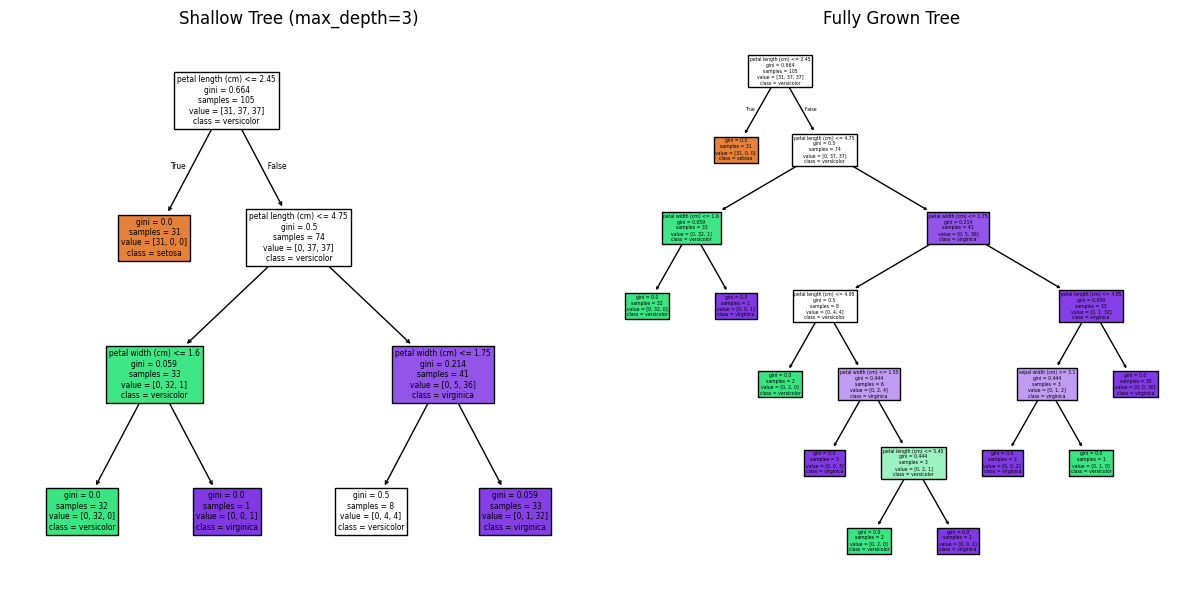

In [ ]:
# Write a Python program to train a Decision Tree Classifier with a maximum depth of 3 and compare its accuracy with a fully grown tree
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X = data.data
y = data.target
feature_names = data.feature_names
class_names = data.target_names

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train decision tree with max_depth=3
shallow_tree = DecisionTreeClassifier(criterion='gini',
                                    max_depth=3,
                                    random_state=42)
shallow_tree.fit(X_train, y_train)

# Create and train fully grown decision tree (no depth limit)
deep_tree = DecisionTreeClassifier(criterion='gini',
                                 random_state=42)
deep_tree.fit(X_train, y_train)

# Make predictions
y_pred_shallow = shallow_tree.predict(X_test)
y_pred_deep = deep_tree.predict(X_test)

# Calculate accuracies
accuracy_shallow = accuracy_score(y_test, y_pred_shallow)
accuracy_deep = accuracy_score(y_test, y_pred_deep)

# Print comparison results
print("Decision Tree Classifier Comparison")
print("----------------------------------")
print(f"Shallow Tree (max_depth=3) Accuracy: {accuracy_shallow:.4f}")
print(f"Fully Grown Tree Accuracy: {accuracy_deep:.4f}")
print(f"Difference: {abs(accuracy_shallow - accuracy_deep):.4f}")

# Print feature importances comparison
print("\nFeature Importances Comparison")
print("Shallow Tree (max_depth=3):")
for name, imp in zip(feature_names, shallow_tree.feature_importances_):
    print(f"  {name}: {imp:.4f}")

print("\nFully Grown Tree:")
for name, imp in zip(feature_names, deep_tree.feature_importances_):
    print(f"  {name}: {imp:.4f}")

# Optional: Visualize both trees
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_tree(shallow_tree, feature_names=feature_names, class_names=class_names, filled=True)
plt.title("Shallow Tree (max_depth=3)")

plt.subplot(1, 2, 2)
plot_tree(deep_tree, feature_names=feature_names, class_names=class_names, filled=True)
plt.title("Fully Grown Tree")

plt.tight_layout()
plt.show()

In [ ]:
# Write a Python program to train a Decision Tree Classifier using min_samples_split=5 and compare its accuracy with a default tree
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the default Decision Tree
default_tree = DecisionTreeClassifier(random_state=42)
default_tree.fit(X_train, y_train)

# Create and train the tree with min_samples_split=5
custom_tree = DecisionTreeClassifier(min_samples_split=5, random_state=42)
custom_tree.fit(X_train, y_train)

# Make predictions
default_pred = default_tree.predict(X_test)
custom_pred = custom_tree.predict(X_test)

# Calculate accuracies
default_accuracy = accuracy_score(y_test, default_pred)
custom_accuracy = accuracy_score(y_test, custom_pred)

# Print results
print("Decision Tree Classifier Comparison")
print("----------------------------------")
print(f"Default Tree Accuracy: {default_accuracy:.4f}")
print(f"Custom Tree (min_samples_split=5) Accuracy: {custom_accuracy:.4f}")

# Compare the results
if default_accuracy > custom_accuracy:
    print("\nThe default tree performed better.")
elif custom_accuracy > default_accuracy:
    print("\nThe custom tree with min_samples_split=5 performed better.")
else:
    print("\nBoth trees performed equally.")

Decision Tree Classifier Comparison
----------------------------------
Default Tree Accuracy: 1.0000
Custom Tree (min_samples_split=5) Accuracy: 1.0000

Both trees performed equally.


In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.multiclass import OneVsRestClassifier

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a base Decision Tree classifier
base_tree = DecisionTreeClassifier(random_state=42)

# Wrap the base classifier with OneVsRest strategy
ovr_tree = OneVsRestClassifier(base_tree)

# Train the OvR classifier
ovr_tree.fit(X_train, y_train)

# Make predictions
ovr_pred = ovr_tree.predict(X_test)

# Calculate accuracy
ovr_accuracy = accuracy_score(y_test, ovr_pred)

# Print results
print("Decision Tree with One-vs-Rest Strategy")
print("--------------------------------------")
print(f"Accuracy: {ovr_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, ovr_pred, target_names=data.target_names))

# For comparison, train a regular Decision Tree
regular_tree = DecisionTreeClassifier(random_state=42)
regular_tree.fit(X_train, y_train)
regular_pred = regular_tree.predict(X_test)
regular_accuracy = accuracy_score(y_test, regular_pred)

print("\nComparison with Regular Decision Tree:")
print(f"Regular Decision Tree Accuracy: {regular_accuracy:.4f}")
print(f"OvR Decision Tree Accuracy: {ovr_accuracy:.4f}")

if ovr_accuracy > regular_accuracy:
    print("\nThe OvR strategy performed better.")
elif regular_accuracy > ovr_accuracy:
    print("\nThe regular Decision Tree performed better.")
else:
    print("\nBoth approaches performed equally.")

Decision Tree with One-vs-Rest Strategy
--------------------------------------
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Comparison with Regular Decision Tree:
Regular Decision Tree Accuracy: 1.0000
OvR Decision Tree Accuracy: 1.0000

Both approaches performed equally.


Model Accuracy: 1.00

Feature Importance Scores:
sepal length (cm): 0.0000
sepal width (cm): 0.0000
petal length (cm): 0.9251
petal width (cm): 0.0749


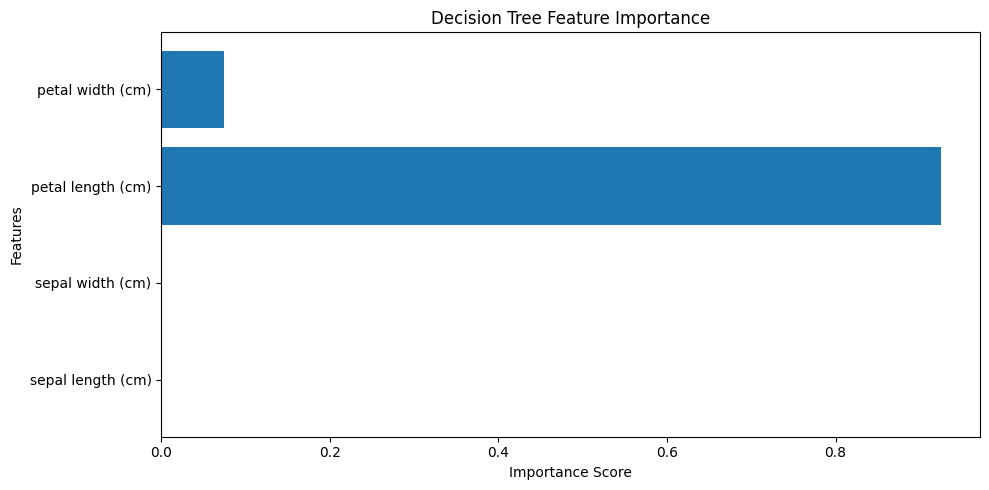


Decision Tree Rules:
|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.60
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.60
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- class: 2



In [ ]:
# Write a Python program to train a Decision Tree Classifier and display the feature importance scores
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X = data.data
y = data.target
feature_names = data.feature_names

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Decision Tree
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)

# Make predictions and calculate accuracy
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Get feature importance scores
importance_scores = tree.feature_importances_

# Display feature importance scores
print("\nFeature Importance Scores:")
for feature, importance in zip(feature_names, importance_scores):
    print(f"{feature}: {importance:.4f}")

# Visualize feature importance
plt.figure(figsize=(10, 5))
plt.barh(feature_names, importance_scores)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Decision Tree Feature Importance')
plt.tight_layout()
plt.show()

# Optional: Print the decision tree rules
from sklearn.tree import export_text
tree_rules = export_text(tree, feature_names=feature_names)
print("\nDecision Tree Rules:")
print(tree_rules)


Restricted Tree (max_depth=5) Performance:
Mean Squared Error: 0.5245
Root Mean Squared Error: 0.7242
R-squared Score: 0.5997

Unrestricted Tree Performance:
Mean Squared Error: 0.4952
Root Mean Squared Error: 0.7037
R-squared Score: 0.6221

Model Comparison:
RMSE Difference: -0.0205
R-squared Difference: -0.0223


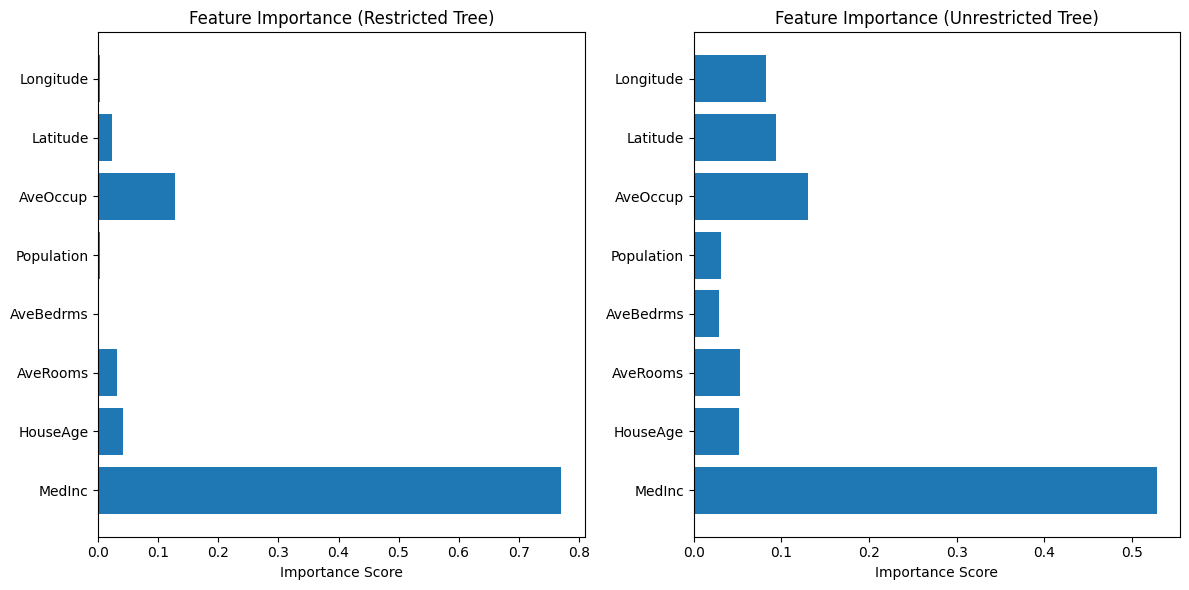

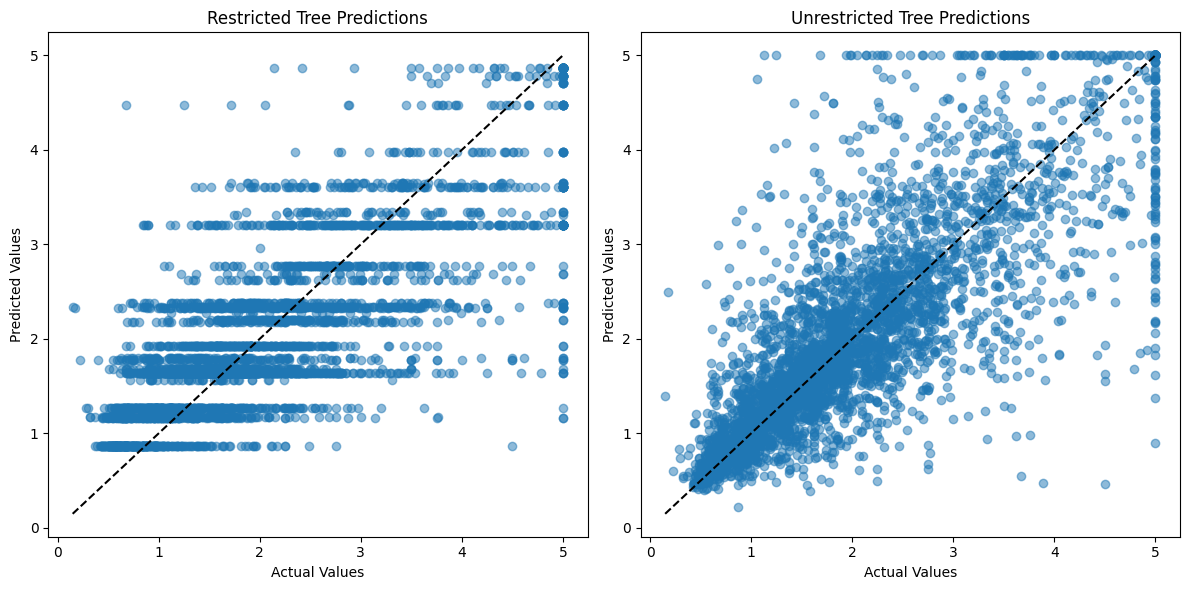

In [ ]:
# Write a Python program to train a Decision Tree Regressor with max_depth=5 and compare its performance with an unrestricted tree
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data = fetch_california_housing()
X = data.data
y = data.target
feature_names = data.feature_names

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the restricted tree (max_depth=5)
restricted_tree = DecisionTreeRegressor(max_depth=5, random_state=42)
restricted_tree.fit(X_train, y_train)

# Create and train the unrestricted tree
unrestricted_tree = DecisionTreeRegressor(random_state=42)
unrestricted_tree.fit(X_train, y_train)

# Make predictions
y_pred_restricted = restricted_tree.predict(X_test)
y_pred_unrestricted = unrestricted_tree.predict(X_test)

# Calculate performance metrics
def evaluate_performance(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{model_name} Performance:")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Root Mean Squared Error: {rmse:.4f}")
    print(f"R-squared Score: {r2:.4f}")
    return rmse, r2

rmse_restricted, r2_restricted = evaluate_performance(y_test, y_pred_restricted, "Restricted Tree (max_depth=5)")
rmse_unrestricted, r2_unrestricted = evaluate_performance(y_test, y_pred_unrestricted, "Unrestricted Tree")

# Compare the models
print("\nModel Comparison:")
print(f"RMSE Difference: {rmse_unrestricted - rmse_restricted:.4f}")
print(f"R-squared Difference: {r2_restricted - r2_unrestricted:.4f}")

# Plot feature importance comparison
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.barh(feature_names, restricted_tree.feature_importances_)
plt.title('Feature Importance (Restricted Tree)')
plt.xlabel('Importance Score')

plt.subplot(1, 2, 2)
plt.barh(feature_names, unrestricted_tree.feature_importances_)
plt.title('Feature Importance (Unrestricted Tree)')
plt.xlabel('Importance Score')

plt.tight_layout()
plt.show()

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_restricted, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.title('Restricted Tree Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_unrestricted, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.title('Unrestricted Tree Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()

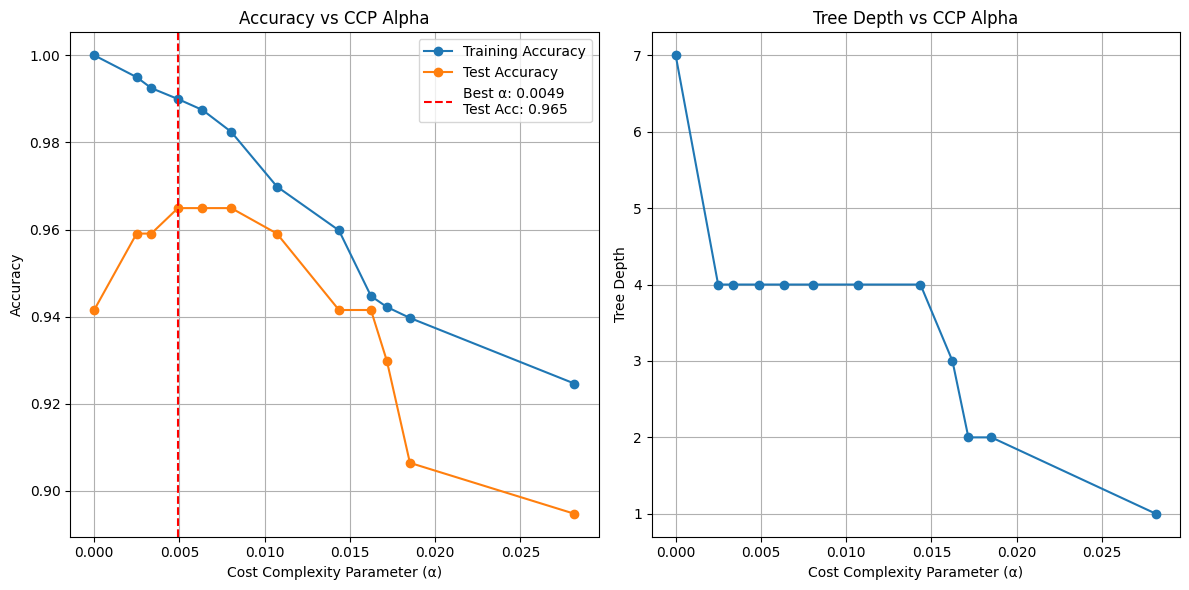


=== Model Evaluation ===
Unpruned Tree Test Accuracy: 0.9415
Best Pruned Tree:
  - CCP Alpha: 0.00491
  - Tree Depth: 4
  - Training Accuracy: 0.9899
  - Test Accuracy: 0.9649

=== Tree Complexity ===
Unpruned Tree Nodes: 31
Pruned Tree Nodes: 19


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split data into training (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train initial decision tree (full depth, no pruning)
full_tree = DecisionTreeClassifier(random_state=42)
full_tree.fit(X_train, y_train)

# Get the cost complexity pruning path
path = full_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas  # Effective alpha values
ccp_alphas = ccp_alphas[:-1]  # Remove the maximum alpha (prunes everything)

# Store results
train_acc = []
test_acc = []
tree_depths = []

# Train trees with different ccp_alpha values
for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    clf.fit(X_train, y_train)

    # Record accuracy and tree depth
    train_acc.append(accuracy_score(y_train, clf.predict(X_train)))
    test_acc.append(accuracy_score(y_test, clf.predict(X_test)))
    tree_depths.append(clf.tree_.max_depth)

# Find the best alpha (highest test accuracy)
best_idx = np.argmax(test_acc)
best_alpha = ccp_alphas[best_idx]
best_acc = test_acc[best_idx]

# Create the visualization
plt.figure(figsize=(12, 6))

# Plot accuracy vs alpha
plt.subplot(1, 2, 1)
plt.plot(ccp_alphas, train_acc, 'o-', label='Training Accuracy')
plt.plot(ccp_alphas, test_acc, 'o-', label='Test Accuracy')
plt.axvline(best_alpha, linestyle='--', color='r',
            label=f'Best α: {best_alpha:.4f}\nTest Acc: {best_acc:.3f}')
plt.xlabel('Cost Complexity Parameter (α)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs CCP Alpha')
plt.legend()
plt.grid(True)

# Plot tree depth vs alpha
plt.subplot(1, 2, 2)
plt.plot(ccp_alphas, tree_depths, 'o-')
plt.xlabel('Cost Complexity Parameter (α)')
plt.ylabel('Tree Depth')
plt.title('Tree Depth vs CCP Alpha')
plt.grid(True)

plt.tight_layout()
plt.show()

# Print summary of results
print("\n=== Model Evaluation ===")
print(f"Unpruned Tree Test Accuracy: {accuracy_score(y_test, full_tree.predict(X_test)):.4f}")
print(f"Best Pruned Tree:")
print(f"  - CCP Alpha: {best_alpha:.5f}")
print(f"  - Tree Depth: {tree_depths[best_idx]}")
print(f"  - Training Accuracy: {train_acc[best_idx]:.4f}")
print(f"  - Test Accuracy: {test_acc[best_idx]:.4f}")

# Optional: Compare number of nodes
print("\n=== Tree Complexity ===")
print(f"Unpruned Tree Nodes: {full_tree.tree_.node_count}")
best_pruned_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha).fit(X_train, y_train)
print(f"Pruned Tree Nodes: {best_pruned_tree.tree_.node_count}")

=== Decision Tree Performance Metrics ===
Precision: 0.9712
Recall: 0.9352
F1-Score: 0.9528

=== Classification Report ===
              precision    recall  f1-score   support

   malignant       0.90      0.95      0.92        63
      benign       0.97      0.94      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



<Figure size 800x600 with 0 Axes>

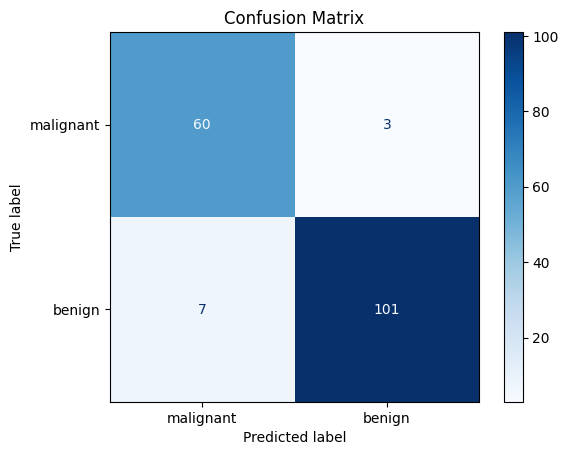

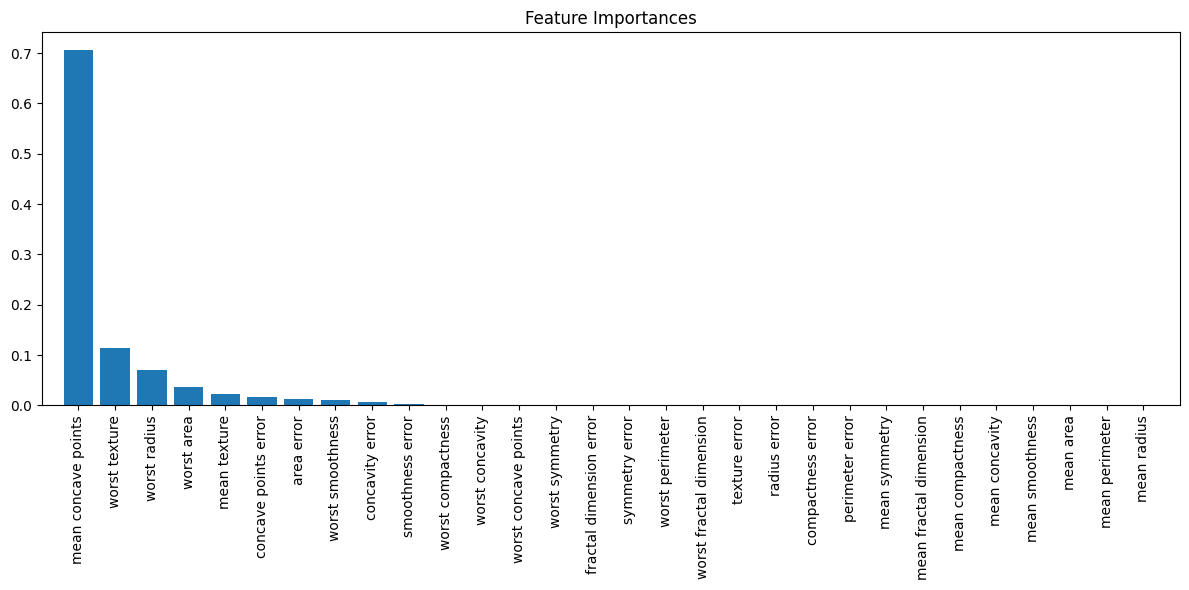

In [2]:
#Write a Python program to train a Decision Tree Classifier and evaluate its performance using Precision, Recall, and F1-Score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (precision_score, recall_score, f1_score,
                            confusion_matrix, classification_report,
                            ConfusionMatrixDisplay)

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split data into training (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate evaluation metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Generate classification report
report = classification_report(y_test, y_pred, target_names=data.target_names)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)

# Print results
print("=== Decision Tree Performance Metrics ===")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}\n")
print("=== Classification Report ===")
print(report)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Feature importance visualization (optional)
plt.figure(figsize=(12, 6))
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), data.feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

╔══════════════════════════════╗
║   Model Evaluation Metrics  ║
╠══════════════════════════════╣
║ Accuracy:  0.9357          ║
║ Precision: 0.9444          ║
║ Recall:    0.9533          ║
║ F1-Score:  0.9488          ║
╚══════════════════════════════╝

Classification Report:
              precision    recall  f1-score   support

   malignant       0.92      0.91      0.91        64
      benign       0.94      0.95      0.95       107

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



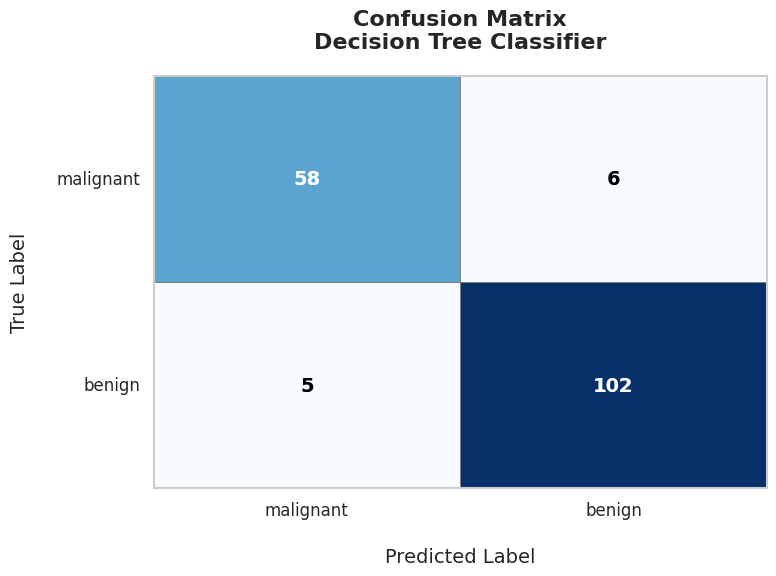

<ipython-input-3-933830620c04>:118: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


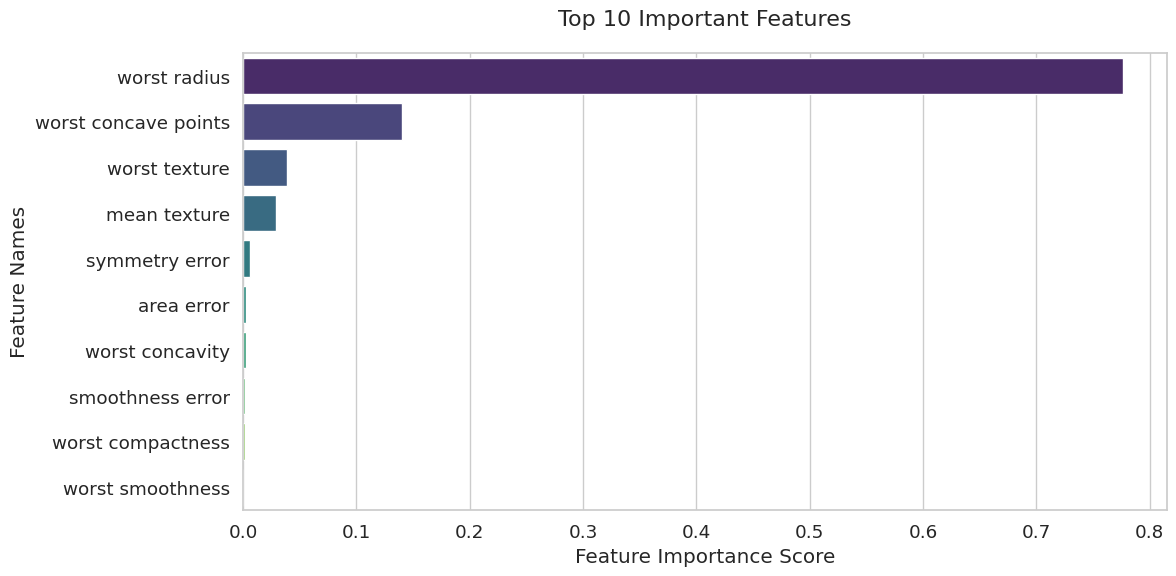

In [3]:
# Write a Python program to train a Decision Tree Classifier and visualize the confusion matrix using seaborn

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix,
                           classification_report,
                           accuracy_score,
                           precision_score,
                           recall_score,
                           f1_score)

# Set Seaborn style for better visuals
sns.set(style="whitegrid", font_scale=1.2)
plt.rcParams["figure.figsize"] = (10, 6)

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target
class_names = data.target_names

# Split data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Train decision tree with some regularization
clf = DecisionTreeClassifier(
    max_depth=4,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]  # Probabilities for positive class

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print metrics
print("╔══════════════════════════════╗")
print("║   Model Evaluation Metrics  ║")
print("╠══════════════════════════════╣")
print(f"║ Accuracy:  {accuracy:.4f}          ║")
print(f"║ Precision: {precision:.4f}          ║")
print(f"║ Recall:    {recall:.4f}          ║")
print(f"║ F1-Score:  {f1:.4f}          ║")
print("╚══════════════════════════════╝\n")

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

# Create enhanced confusion matrix plot
plt.figure(figsize=(8, 6))
ax = sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False,
    annot_kws={"size": 14},
    linewidths=0.5,
    linecolor="grey"
)

# Customize plot appearance
ax.set_title(
    "Confusion Matrix\nDecision Tree Classifier",
    fontsize=16,
    pad=20,
    fontweight="bold"
)
ax.set_xlabel("\nPredicted Label", fontsize=14)
ax.set_ylabel("True Label\n", fontsize=14)
ax.xaxis.set_ticklabels(class_names, rotation=0, fontsize=12)
ax.yaxis.set_ticklabels(class_names, rotation=0, fontsize=12)

# Add value annotations with contrasting colors
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        color = "white" if cm[i, j] > cm.max()/2 else "black"
        ax.text(
            j+0.5,
            i+0.5,
            cm[i, j],
            ha="center",
            va="center",
            color=color,
            fontsize=14,
            fontweight="bold"
        )

# Add border
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1.5)

plt.tight_layout()
plt.show()

# Optional: Visualize feature importance
plt.figure(figsize=(12, 6))
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1][:10]  # Top 10 features
sns.barplot(
    x=importances[indices],
    y=data.feature_names[indices],
    palette="viridis"
)
plt.title("Top 10 Important Features", fontsize=16, pad=20)
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature Names")
plt.tight_layout()
plt.show()

Performing grid search...
Fitting 5 folds for each of 60 candidates, totalling 300 fits

=== Grid Search Results ===
Best parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
Best cross-validation accuracy: 0.9424

=== Test Set Evaluation ===
Test accuracy: 0.9240

Classification Report:
              precision    recall  f1-score   support

   malignant       0.92      0.88      0.90        64
      benign       0.93      0.95      0.94       107

    accuracy                           0.92       171
   macro avg       0.92      0.91      0.92       171
weighted avg       0.92      0.92      0.92       171



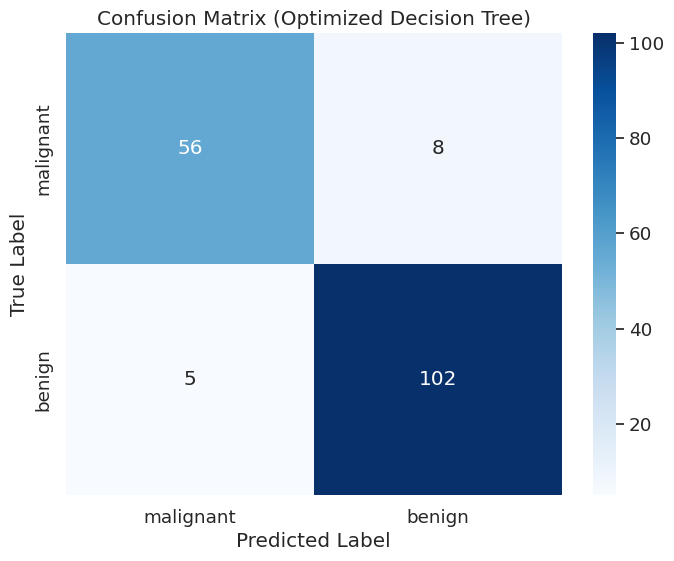

<ipython-input-4-cc2cdc0cef82>:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=feature_names[indices], palette='viridis')


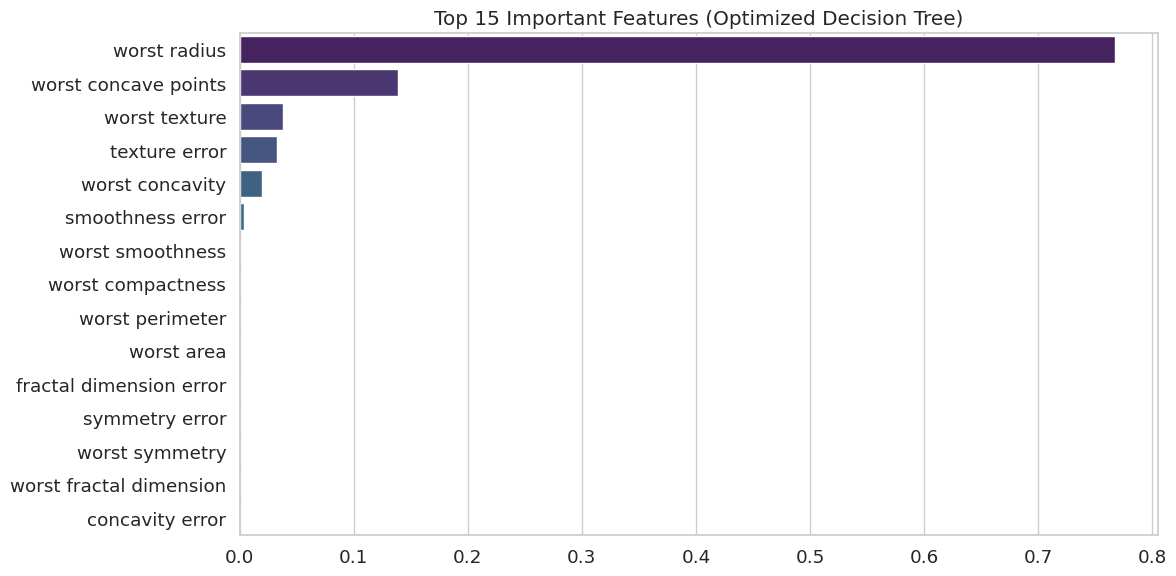

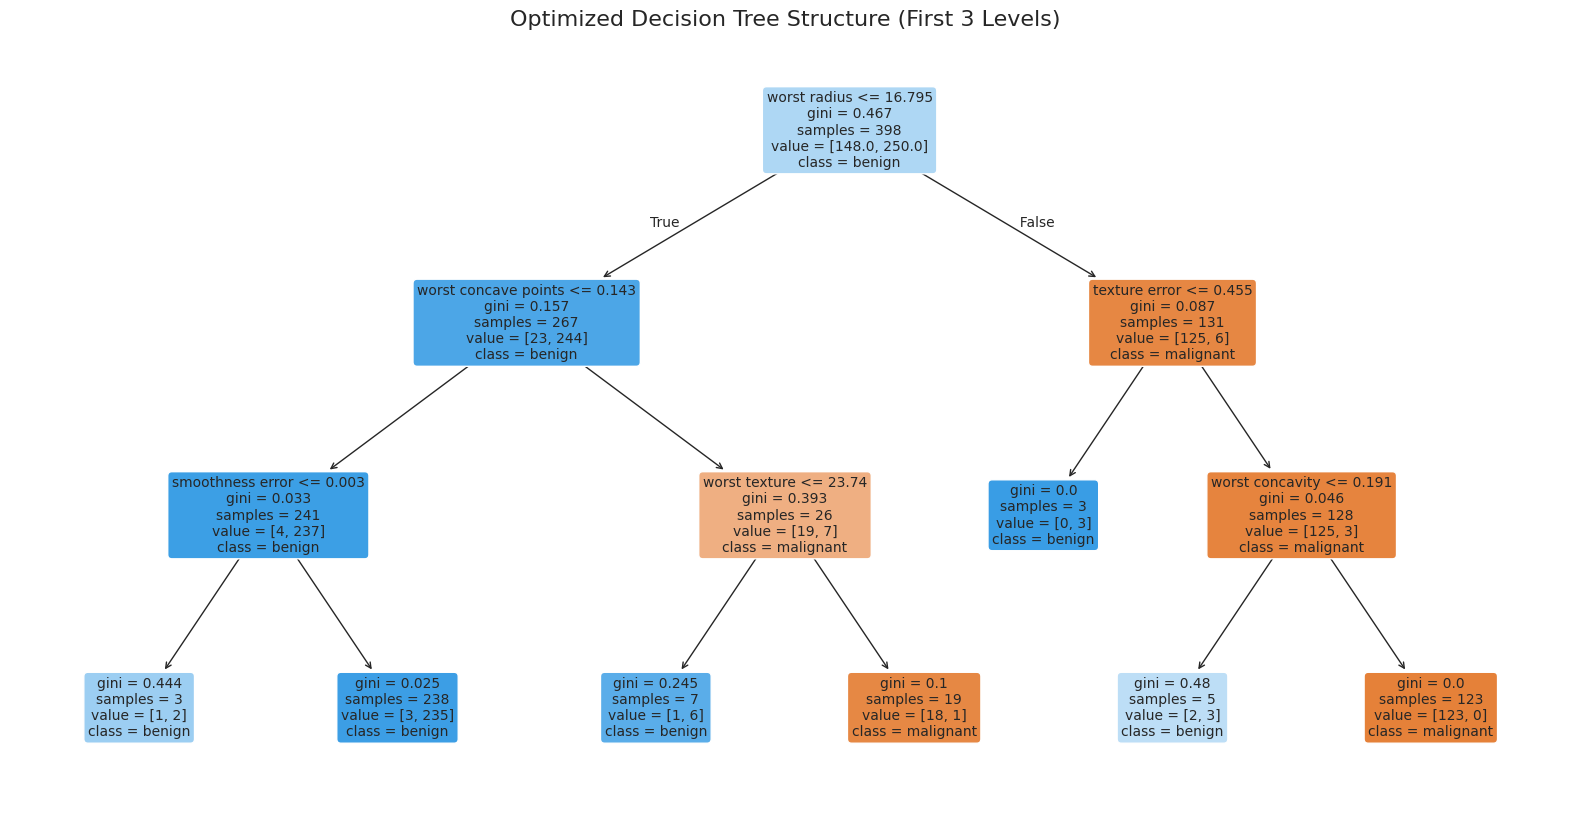

In [4]:
# Write a Python program to train a Decision Tree Classifier and use GridSearchCV to find the optimal values for max_depth and min_samples_split.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import (accuracy_score, precision_score,
                           recall_score, f1_score, confusion_matrix,
                           classification_report)

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
class_names = data.target_names

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Initialize decision tree classifier
dt_clf = DecisionTreeClassifier(random_state=42)

# Define parameter grid to search
param_grid = {
    'max_depth': [3, 5, 7, 9, 11, None],
    'min_samples_split': [2, 5, 10, 15, 20],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=dt_clf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Perform grid search
print("Performing grid search...")
grid_search.fit(X_train, y_train)

# Get best parameters and model
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_clf = grid_search.best_estimator_

# Print results
print("\n=== Grid Search Results ===")
print(f"Best parameters: {best_params}")
print(f"Best cross-validation accuracy: {best_score:.4f}")

# Evaluate on test set
y_pred = best_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print("\n=== Test Set Evaluation ===")
print(f"Test accuracy: {test_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix (Optimized Decision Tree)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Visualize feature importance
plt.figure(figsize=(12, 6))
importances = best_clf.feature_importances_
indices = np.argsort(importances)[::-1][:15]  # Top 15 features
sns.barplot(x=importances[indices], y=feature_names[indices], palette='viridis')
plt.title('Top 15 Important Features (Optimized Decision Tree)')
plt.tight_layout()
plt.show()

# Optional: Visualize the decision tree structure
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(best_clf,
          filled=True,
          feature_names=feature_names,
          class_names=class_names,
          rounded=True,
          fontsize=10,
          max_depth=3)  # Limit depth for visualization
plt.title("Optimized Decision Tree Structure (First 3 Levels)", fontsize=16)
plt.show()